## Introduction

##### The purpose of this notebook is to analyze data to answer the question of whether school performance (measured by ACT scores) is predicted by socioeconomic factors.

This notebook mainly utilizes the data set that was previously cleaned *(final_clean_education_inequality_data.csv)*, along with a new data set from the National Center of Education Statistics *(internet.csv)* to determine whether ACT scores are also predicted by students' access to a computer or internet at home.

## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Import additional libraries

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/kikayjane/Education-Inequality/main/final_clean_ei_data.csv')

In [5]:
internet = pd.read_csv('https://raw.githubusercontent.com/kikayjane/Education-Inequality/main/internet.csv')

##### $\rightarrow$ Review the contents of the data set.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7851 entries, 0 to 7850
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7851 non-null   int64  
 1   rate_unemployment  7851 non-null   float64
 2   percent_college    7851 non-null   float64
 3   percent_married    7851 non-null   float64
 4   median_income      7851 non-null   float64
 5   average_act        7851 non-null   float64
 6   percent_lunch      7851 non-null   float64
 7   year               7851 non-null   object 
 8   state              7851 non-null   object 
 9   zip_code           7851 non-null   int64  
 10  school_type        7851 non-null   object 
 11  school_level       7851 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 736.2+ KB


In [7]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High


In [8]:
df.tail()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level
7846,560530200294,0.034549,0.590780,0.720077,64891.0,18.5,0.232156,2016-2017,WY,82902,Regular School,High
7847,560569000311,0.069538,0.633860,0.808841,44603.0,22.3,0.083871,2016-2017,WY,82833,Regular School,High
7848,560569500360,0.035159,0.764566,0.776570,44896.0,21.5,0.184829,2016-2017,WY,82801,Regular School,High
7849,560576200324,0.063877,0.670532,0.879324,92134.0,19.7,0.112583,2016-2017,WY,82935,Regular School,High
7850,560583000335,0.033553,0.736511,0.821128,73849.0,21.8,0.163701,2016-2017,WY,83001,Regular School,High


In [9]:
df.describe()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,zip_code
count,7.851000e+03,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000
mean,3.325567e+11,0.097849,0.569440,0.635533,52199.202395,20.219922,0.419113,44905.225576
std,1.325836e+11,0.057661,0.165695,0.194963,24176.052163,2.528672,0.237627,24062.899249
min,1.000016e+11,0.000000,0.091493,0.000000,3589.000000,12.362637,0.000000,1001.000000
25%,2.105010e+11,0.058505,0.451339,0.526274,36817.000000,18.663004,0.238486,28459.500000
50%,3.600086e+11,0.085191,0.555836,0.668715,47018.000000,20.400000,0.379765,45303.000000
75%,4.700090e+11,0.122429,0.677160,0.777778,61530.500000,21.935287,0.570927,62406.000000
max,5.605830e+11,0.576125,1.000000,1.000000,226181.000000,32.362637,0.998729,99403.000000


##### $\rightarrow$ Review Internet Data


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   STATEFP      6930 non-null   int64 
 1   GEOID        6930 non-null   int64 
 2   NAME         6930 non-null   object
 3   CDP02_92E    6930 non-null   int64 
 4   OBJECTID     6930 non-null   int64 
 5   NCESID       6930 non-null   int64 
 6   STATEABBREV  6930 non-null   object
dtypes: int64(5), object(2)
memory usage: 379.1+ KB


In [11]:
internet.columns

Index(['STATEFP', 'GEOID', 'NAME', 'CDP02_92E', 'OBJECTID', 'NCESID',
       'STATEABBREV'],
      dtype='object')

In [12]:
internet.head()

,STATEFP,GEOID,NAME,CDP02_92E,OBJECTID,NCESID,STATEABBREV
0,10,1000080,Appoquinimink School District,6340,3617,1000080,DE
1,10,1000170,Cape Henlopen School District,2995,3618,1000170,DE
2,10,1000180,Caesar Rodney School District,4510,3619,1000180,DE
3,10,1000190,Capital School District,4610,3620,1000190,DE
4,10,1000200,Christina School District,12875,3621,1000200,DE


In [13]:
# Remove unnecessary columns
internet = internet[['NCESID','CDP02_92E']]

In [14]:
# Rename columns
internet = internet.rename(columns={"NCESID":"id",
              "CDP02_92E":"comp_int_access"})

In [15]:
internet.head()

,id,comp_int_access
0,1000080,6340
1,1000170,2995
2,1000180,4510
3,1000190,4610
4,1000200,12875


In [16]:
# Merge clean data and internet data based on ID number
internet['merge_id'] = internet['id'].astype(str).str[:7]
df['merge_id'] = df['id'].astype(str).str[:7]
merged_df = pd.merge(internet, df, on='merge_id', how='inner')

In [17]:
internet_df = merged_df

In [18]:
# Remove unncessary columns from merged data frame
internet_df = internet_df[['id_y','rate_unemployment','percent_college','percent_married','median_income','average_act','percent_lunch','comp_int_access','year','state','zip_code','school_type']]

In [19]:
internet_df = internet_df.rename(columns={"id_y":"id"})

In [20]:
internet_df.state.unique()

array(['DE', 'FL', 'GA', 'IL', 'IN', 'KY', 'LA', 'MA', 'MI', 'MO', 'NC',
       'NJ', 'OH', 'PA', 'TN', 'TX', 'WA', 'WI', 'WY'], dtype=object)

In [21]:
df.state.unique()

array(['DE', 'FL', 'GA', 'IL', 'IN', 'KY', 'LA', 'MA', 'MI', 'MO', 'NJ',
       'NY', 'NC', 'OH', 'PA', 'TN', 'TX', 'WA', 'WI', 'WY'], dtype=object)

## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.


*   How does access to computers and the internet correlate with average ACT scores?
*   Is there a relationship between the percentage of college-educated adults in a community and its school's average ACT scores?
*   What is the correlation between average ACT scores and median household income?
*   How do multiple socioeconomic factors together influence ACT scores when controlling for other variables like state, school type, or school level?





## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

### Regression Analysis

In [22]:
df.columns

Index(['id', 'rate_unemployment', 'percent_college', 'percent_married',
       'median_income', 'average_act', 'percent_lunch', 'year', 'state',
       'zip_code', 'school_type', 'school_level', 'merge_id'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['median_income', 'rate_unemployment', 'percent_college', 'percent_lunch', 'percent_married']]
y = df['average_act']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 9.62448738e-08 -2.25284291e+00  1.69058604e+00 -7.53229827e+00
 -5.94286105e-02]
Mean squared error: 2.23
Coefficient of determination: 0.65


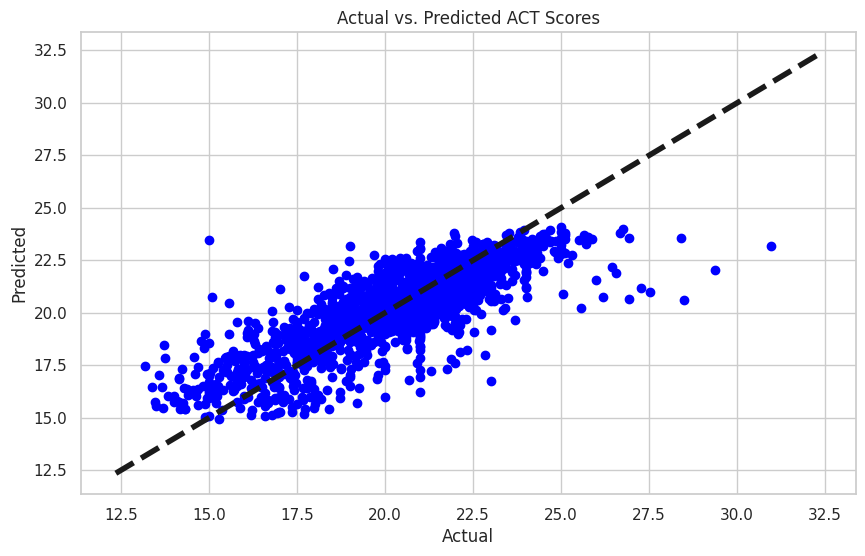

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color = 'blue')
plt.plot([y.min(),y.max()],[y.min(),y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted ACT Scores')
plt.show()

In [25]:
import statsmodels.api as sm

X = sm.add_constant(df[['median_income', 'rate_unemployment', 'percent_college', 'percent_lunch', 'percent_married']])
y = df['average_act']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     2606.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        05:27:31   Log-Likelihood:                -14581.
No. Observations:                7851   AIC:                         2.917e+04
Df Residuals:                    7845   BIC:                         2.922e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.7240      0.13

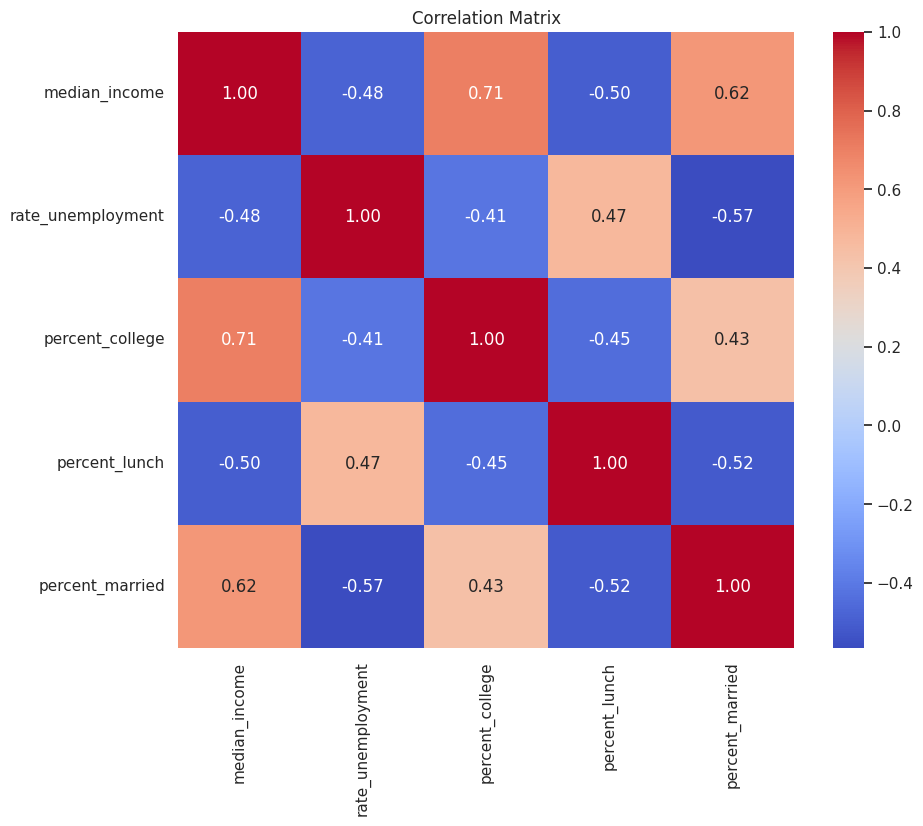

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
corr_matrix = df[['median_income', 'rate_unemployment', 'percent_college', 'percent_lunch', 'percent_married']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

In [27]:
X = df[['percent_college','percent_lunch','rate_unemployment']]  # independent variables
y = df['average_act']  # dependent variable

# Adding a constant term for the intercept
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     4344.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        05:27:33   Log-Likelihood:                -14582.
No. Observations:                7851   AIC:                         2.917e+04
Df Residuals:                    7847   BIC:                         2.920e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.6696      0.09

##### After removing features that weren't significant to model, the regression model remains the same.

### Visualizations

In [28]:
import plotly.express as px

fig = px.choropleth(df, locations="state",
                    locationmode="USA-states",
                    color="average_act",
                    scope="usa",
                    title="Average ACT Scores by State")
fig.show()

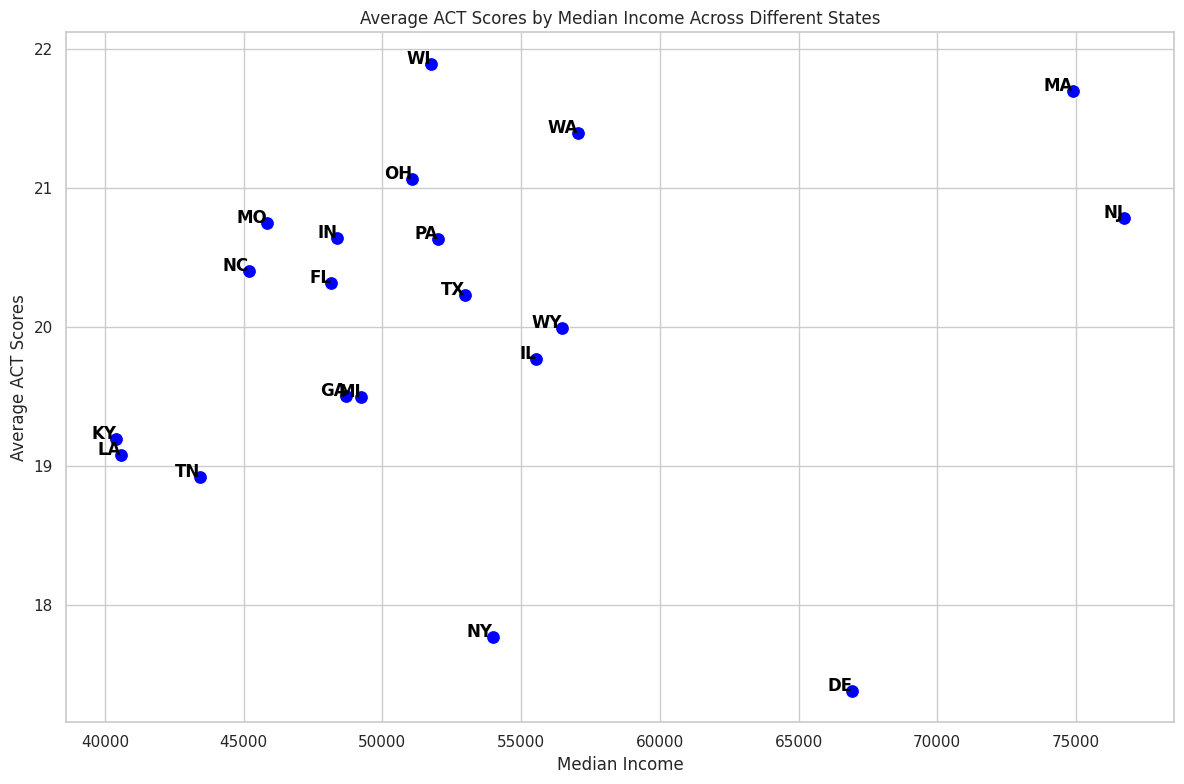

In [29]:
df['median_income'] = pd.to_numeric(df['median_income'], errors='coerce')
df['average_act'] = pd.to_numeric(df['average_act'], errors='coerce')

# Aggregate data by state to get average values
state_data = df.groupby('state').agg({
    'median_income': np.mean,
    'average_act': np.mean
}).reset_index()

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='median_income', y='average_act', data=state_data, color='blue', s=100)

# Adding state labels to each point
for i in range(state_data.shape[0]):
    plt.text(state_data['median_income'][i], state_data['average_act'][i], state_data['state'][i],
             horizontalalignment='right', size='medium', color='black', weight='semibold')

# Add titles and labels
plt.title('Average ACT Scores by Median Income Across Different States')
plt.xlabel('Median Income')
plt.ylabel('Average ACT Scores')

# Show the plot
plt.tight_layout()
plt.show()


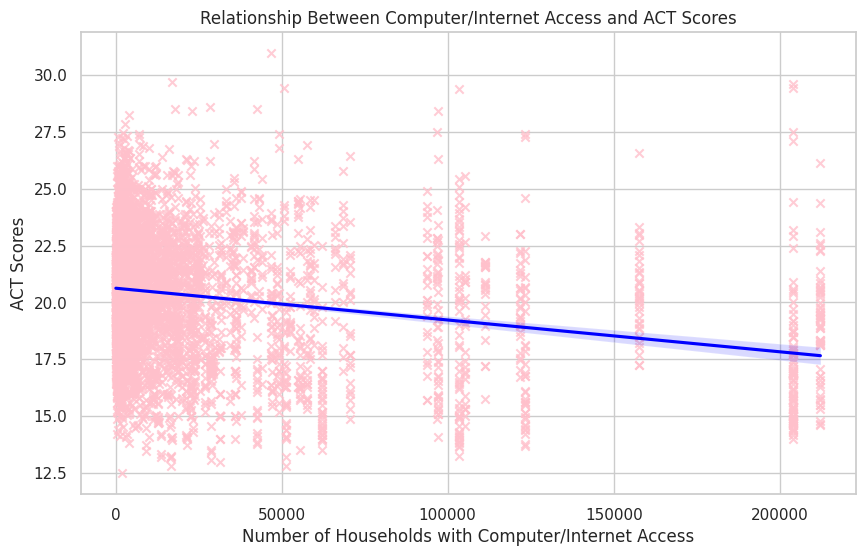

In [30]:
internet_df['comp_int_access'] = pd.to_numeric(internet_df['comp_int_access'], errors='coerce')
internet_df['average_act'] = pd.to_numeric(internet_df['average_act'], errors='coerce')

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='comp_int_access', y='average_act', data=internet_df, color='pink', line_kws={'color': 'blue'}, marker='x', ci=95)

# Adding titles and labels
plt.title('Relationship Between Computer/Internet Access and ACT Scores')
plt.xlabel('Number of Households with Computer/Internet Access')
plt.ylabel('ACT Scores')

# Show the plot
plt.show()

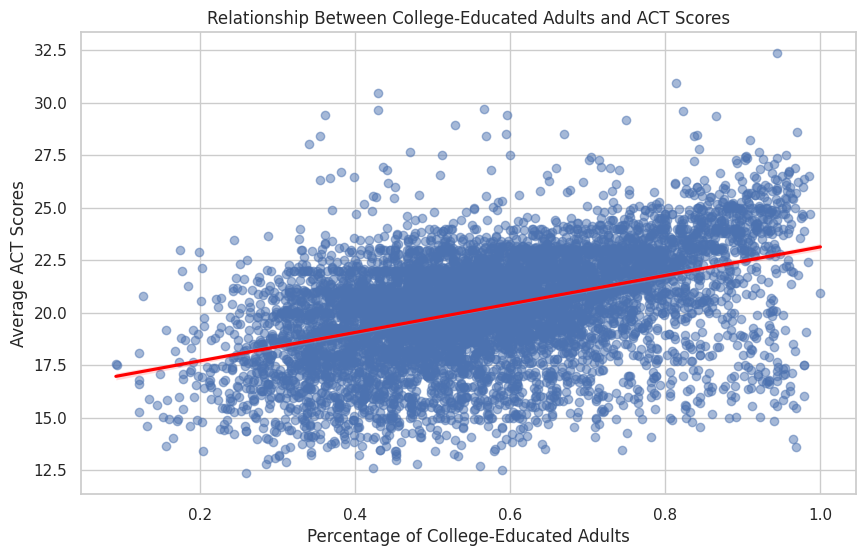

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x='percent_college', y='average_act', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship Between College-Educated Adults and ACT Scores')
plt.xlabel('Percentage of College-Educated Adults')
plt.ylabel('Average ACT Scores')
plt.show()

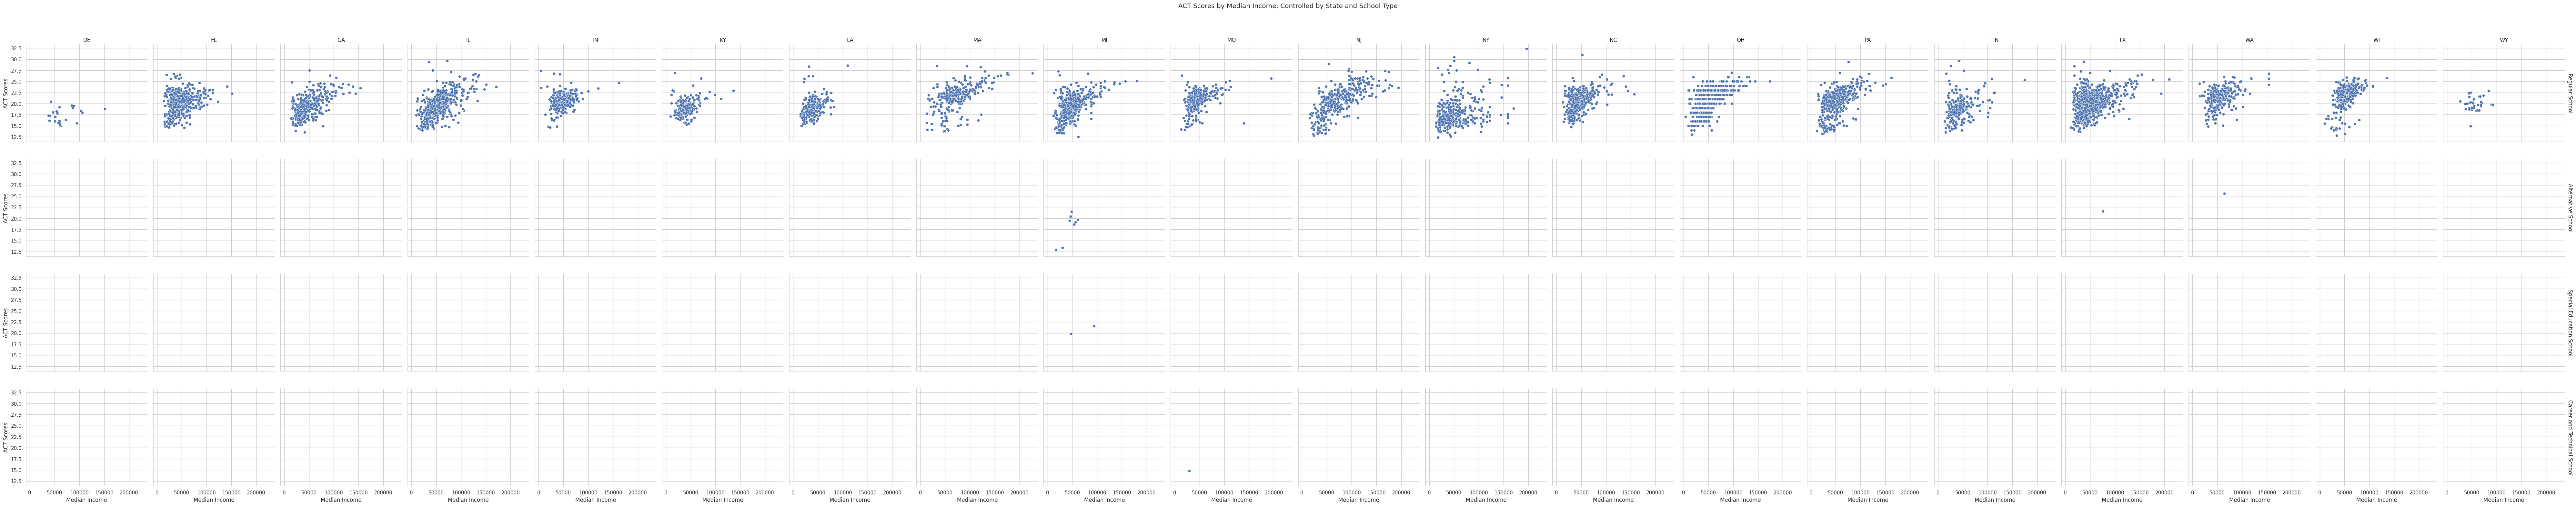

In [32]:
g = sns.FacetGrid(df, col='state', row='school_type', margin_titles=True, height=4)
g.map_dataframe(sns.scatterplot, 'median_income', 'average_act')
g.set_axis_labels('Median Income', 'ACT Scores')
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('ACT Scores by Median Income, Controlled by State and School Type')
plt.show()

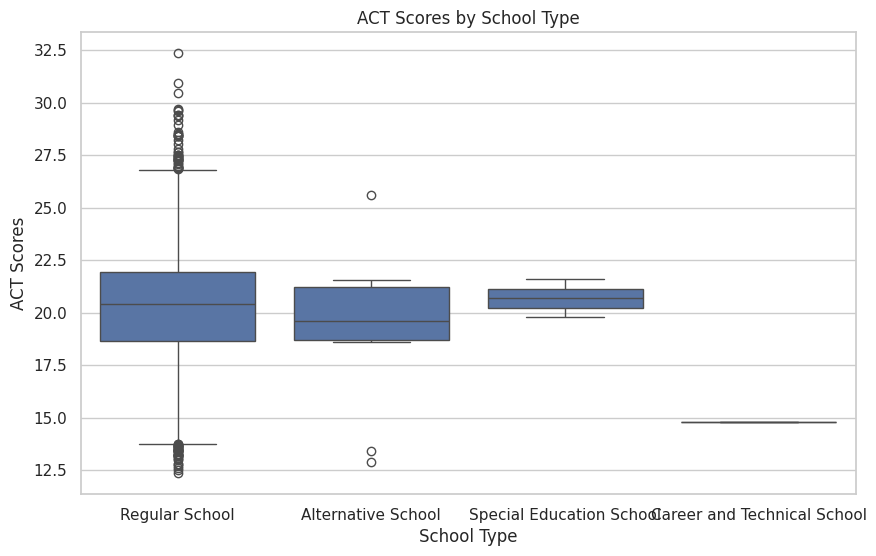

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='school_type', y='average_act', data=df)
plt.title('ACT Scores by School Type')
plt.xlabel('School Type')
plt.ylabel('ACT Scores')
plt.show()

In [34]:
df.state.unique()

array(['DE', 'FL', 'GA', 'IL', 'IN', 'KY', 'LA', 'MA', 'MI', 'MO', 'NJ',
       'NY', 'NC', 'OH', 'PA', 'TN', 'TX', 'WA', 'WI', 'WY'], dtype=object)

In [35]:
state_to_region = {'DE':'South','FL':'South','GA':'South','IL':'Midwest','IN':'Midwest',
                   'KY':'South','LA':'South','MA':'East','MI':'Midwest','MO':'Midwest',
                   'NC':'South','NJ':'East','NY':'East','OH':'Midwest','PA':'East',
                   'TN':'South','TX':'South','WA':'West','WI':'Midwest','WY':'West'}
df['region'] = df['state'].map(state_to_region)

In [36]:
region_scores = df.groupby('region')['average_act'].mean().reset_index()
region_scores = region_scores.sort_values('average_act')

<ipython-input-37-719183247d3f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




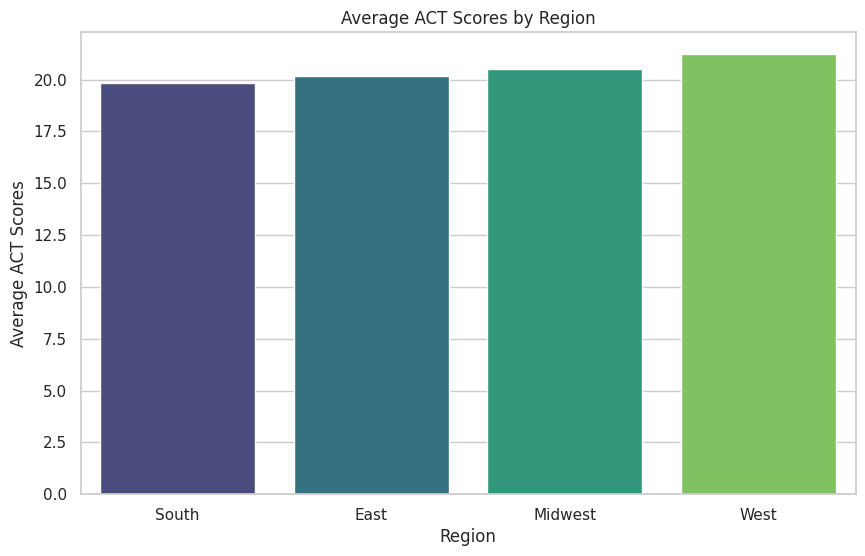

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x='region',y='average_act',data=region_scores, palette='viridis')
plt.title('Average ACT Scores by Region')
plt.xlabel('Region')
plt.ylabel('Average ACT Scores')
plt.show()

## Conclusion

Provide a brief description of your conclusions.

##### The graphs show socioeconomic factors like money, education levels, and access to technology affect student ACT scores across different areas. The predictions on ACT scores from the model are quite accurate. States with higher incomes generally see higher ACT scores, but just having more computers and internet access doesn't always mean better scores. Places with more college-educated adults tend to have higher ACT scores, showing the community's influence on education. Finally, students in the West generally score higher on the ACT compared to those in the Midwest, East, and South, pointing to regional differences in education quality and resources.